# Iris Flower Classification

# Import libraries 

In [26]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Import Dataset 

In [27]:
df = sns.load_dataset('iris')

In [28]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# EDA

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [31]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [32]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 150 rows and 5 columns


In [33]:
# Value counts of species
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [34]:
# check for duplicates
df.duplicated().sum()
# drop them
df.drop_duplicates(inplace=True)
# check again
df.duplicated().sum()

np.int64(0)

In [35]:
# 1. Relationship between species and sepal_length using plotly
fig = px.box(df, x='species', y='sepal_length', color='species')
fig.show()

In [36]:
# 2. Relationship between species and sepal_width using plotly
fig = px.box(df, x='species', y='sepal_width', color='species')
fig.show()

In [37]:
# 3. Relationship between species and petal_length using plotly
fig = px.box(df, x='species', y='petal_length', color='species')
fig.show()

In [38]:
# 4. Relationship between species and petal_width using plotly
fig = px.box(df, x='species', y='petal_width', color='species')
fig.show()

In [39]:
# 5. Relationship between sepal_length and sepal_width using plotly
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species')
fig.show()

In [40]:
# 6. Relationship between petal_length and petal_width using plotly
fig = px.scatter(df, x='petal_length', y='petal_width', color='species')
fig.show()

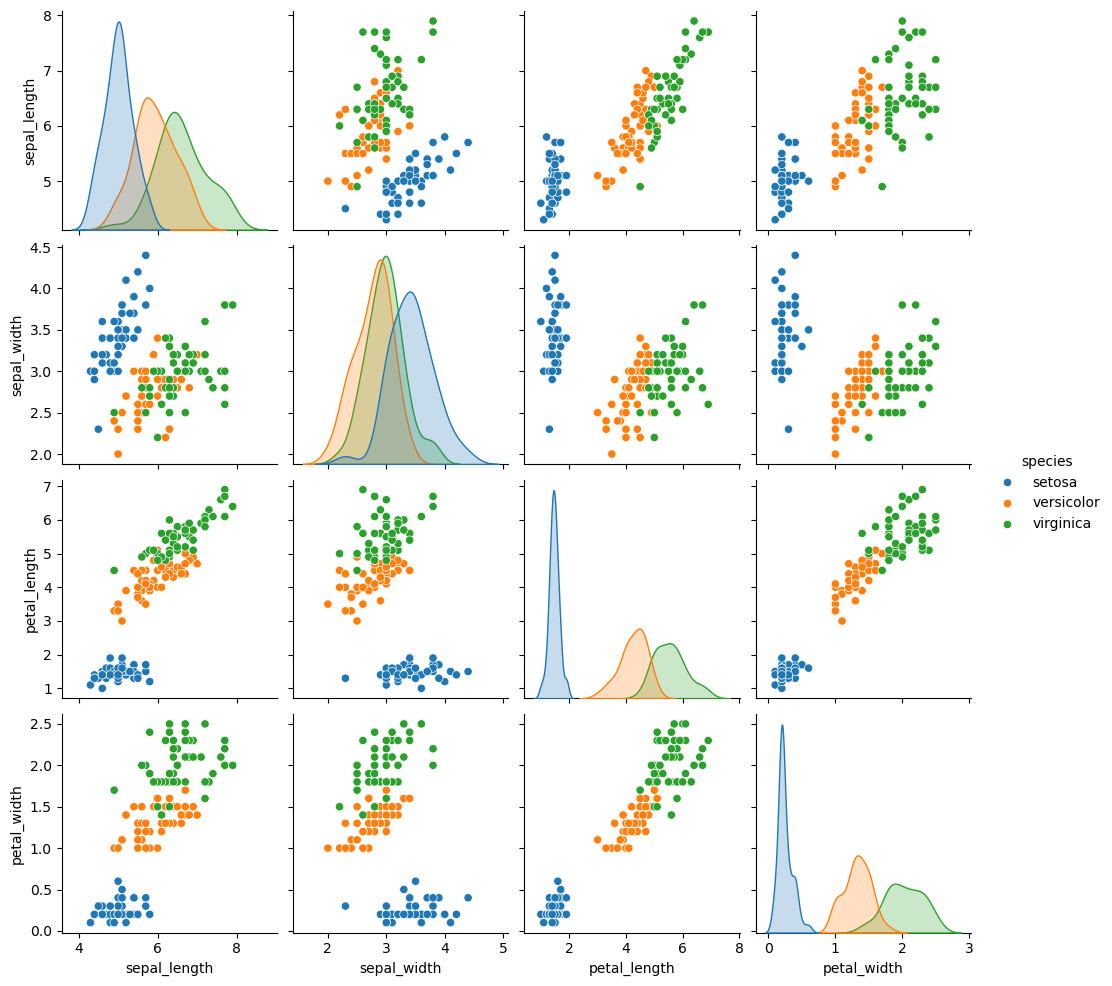

In [41]:
# Pairplot
sns.pairplot(df, hue='species')
plt.show()

# Model Building

In [42]:
# enode the categorical features
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [43]:
# split the data
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


- the accuracy is 1.0 for Iris because Decision Trees can easily fit small datasets.

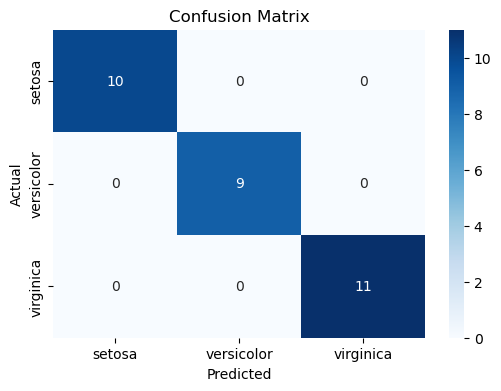

In [46]:
# Predictions
y_pred = dt.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

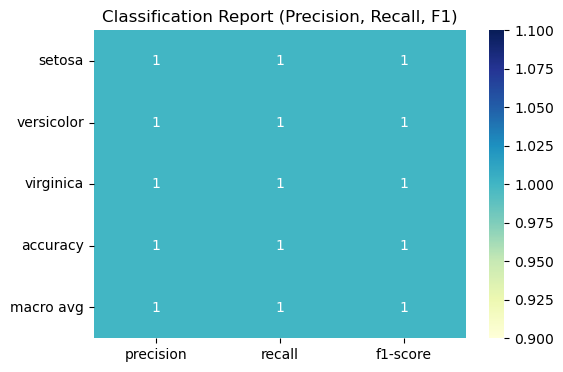

In [47]:
# Classification Report as DataFrame
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(6,4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")  # Ignore 'accuracy' row
plt.title("Classification Report (Precision, Recall, F1)")
plt.show()


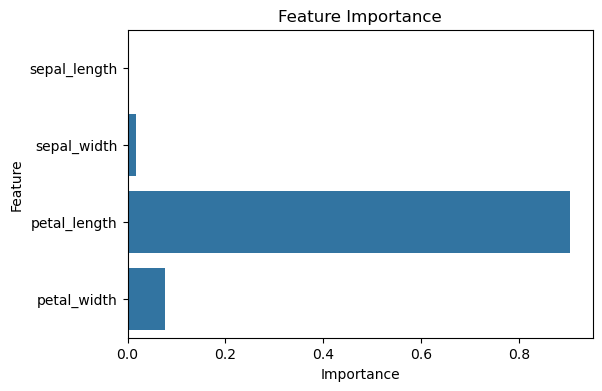

In [48]:
# Feature Importance
feature_importance = dt.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [49]:
from sklearn.datasets import load_iris

iris = load_iris()  # Load iris dataset

# new data
new_data = [[5.1, 3.5, 1.4, 0.2]]

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict 
pred_class = dt.predict(new_data_scaled)[0]
pred_species = iris.target_names[pred_class]  # Correct way

print("Predicted class index:", pred_class)
print("Predicted species:", pred_species)


Predicted class index: 0
Predicted species: setosa


In [50]:
new_data = [[6.3, 3.3, 6.0, 2.5]]

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict 
pred_class = dt.predict(new_data_scaled)[0]
pred_species = iris.target_names[pred_class]  # Correct way

print("Predicted class index:", pred_class)
print("Predicted species:", pred_species)


Predicted class index: 2
Predicted species: virginica
